In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from glob import glob

In [2]:
recession = pd.read_csv('../../Datasets/Recession.csv')
recession.head(5)

,DATE,JHDUSRGDPBR
0,1967-10-01,0.0
1,1968-01-01,0.0
2,1968-04-01,0.0
3,1968-07-01,0.0
4,1968-10-01,0.0


In [3]:
files = glob('prediction/*.csv')
files = sorted(files)
li = []
for f in files:
    temp_df = pd.read_csv(f)
    temp_df = temp_df.set_index('DATE')
    li.append(temp_df)
    temp_df = None

prediction = pd.DataFrame()
for i in range(len(li)):
    prediction[f'predict_{i+1}'] = li[i]
    
prediction

,predict_1,predict_2,predict_3,predict_4,predict_5
DATE,,,,,
1976-09-29,0,NaN,NaN,NaN,NaN
1976-09-30,0,NaN,NaN,NaN,NaN
1976-10-01,0,NaN,NaN,NaN,NaN
1976-10-02,0,NaN,NaN,NaN,NaN
1976-10-05,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-06-22,0,NaN,NaN,NaN,NaN
2023-06-23,0,NaN,NaN,NaN,NaN
2023-06-24,0,NaN,NaN,NaN,NaN


In [4]:
prediction = prediction.ffill().fillna(0)

In [5]:
prediction['final'] = prediction.sum(axis=1)
prediction

,predict_1,predict_2,predict_3,predict_4,predict_5,final
DATE,,,,,,
1976-09-29,0,0.0,0.0,0.0,0.0,0.0
1976-09-30,0,0.0,0.0,0.0,0.0,0.0
1976-10-01,0,0.0,0.0,0.0,0.0,0.0
1976-10-02,0,0.0,0.0,0.0,0.0,0.0
1976-10-05,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2023-06-22,0,0.0,0.0,0.0,0.0,0.0
2023-06-23,0,0.0,0.0,0.0,0.0,0.0
2023-06-24,0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='DATE'>

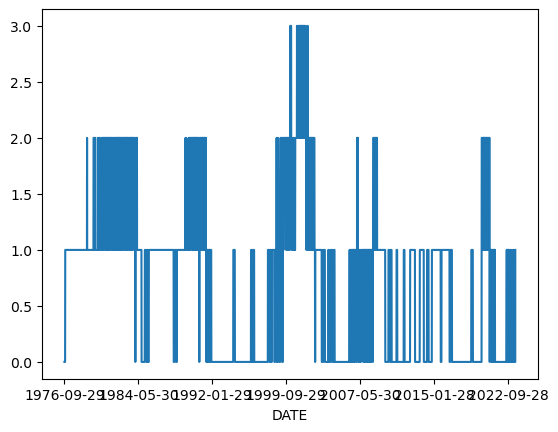

In [6]:
prediction['final'].plot()

In [7]:
recession.columns = ['DATE', 'recession']
recession['DATE'] = pd.to_datetime(recession['DATE'])
start = []
end = []
for i, date in enumerate(recession.DATE):
  if i == 0 or i==len(recession.DATE)-1:
    continue
  if (recession.recession[i-1] == 0) & (recession.recession[i] == 1):
    start.append(date)
  elif (recession.recession[i] == 1) & (recession.recession[i+1] == 0):
    end.append(date)
print(start)
print(end)

[Timestamp('1969-04-01 00:00:00'), Timestamp('1973-10-01 00:00:00'), Timestamp('1979-04-01 00:00:00'), Timestamp('1981-04-01 00:00:00'), Timestamp('1989-10-01 00:00:00'), Timestamp('2001-01-01 00:00:00'), Timestamp('2007-10-01 00:00:00'), Timestamp('2020-01-01 00:00:00')]
[Timestamp('1970-10-01 00:00:00'), Timestamp('1975-01-01 00:00:00'), Timestamp('1980-04-01 00:00:00'), Timestamp('1982-04-01 00:00:00'), Timestamp('1991-01-01 00:00:00'), Timestamp('2001-07-01 00:00:00'), Timestamp('2009-04-01 00:00:00'), Timestamp('2020-04-01 00:00:00')]


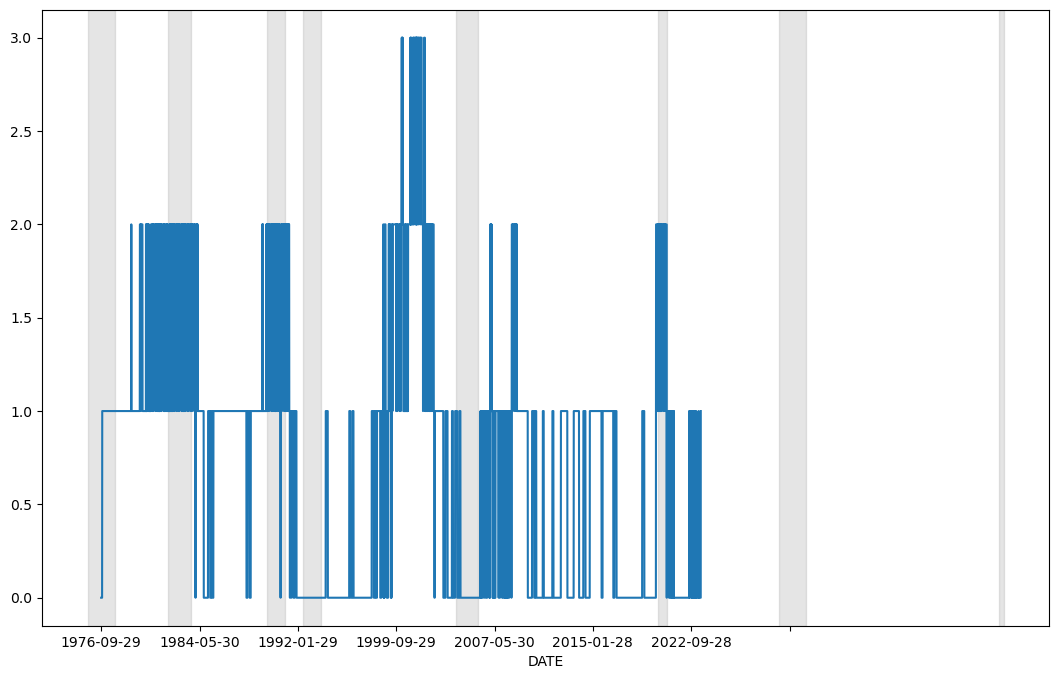

In [9]:
fig, ax = plt.subplots(figsize=(13,8))
prediction['final'].plot(ax=ax)
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)